In [2]:
from pathlib import Path
import sys

notebook_dir = Path.cwd()
others_path = notebook_dir.parent

others_path = others_path.resolve()
if str(others_path) not in sys.path:
    sys.path.append(str(others_path))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d

import eos
import kernels
import gaussianprocess
import prepare_ceft as pc
import prepare_pqcd as pp
import sampling as sam
import anal_helpers as anal
from constants import ns, crust_end, get_phi
from pqcd.pQCD import pQCD

In [3]:
path = others_path.parent / 'results/presentation&writing/seminar/'

# eos mr curves

In [4]:
kernel = "SE"
n_end = 20

In [5]:
n_test = anal.get_n_test(n_end,200)
n_ceft, cs2_ceft_avg, cs2_ceft_lower, cs2_ceft_upper = anal.get_ceft_cs2()


samples_valid = np.load(path / f"{kernel}_{n_end}ns_valid_eos.npy")
edens_val = samples_valid[0]
prezzes_val = samples_valid[1]
cs2s_val = samples_valid[2]

tov_valid = np.load(path / f"{kernel}_{n_end}ns_valid_tidal.npy")
r_val = tov_valid[0]
m_val = tov_valid[1]
l_val = tov_valid[2]

samples_invalid = np.load(path / f"{kernel}_{n_end}ns_invalid_eos.npy")
edens_inval = samples_invalid[0]
prezzes_inval = samples_invalid[1]
cs2s_inval = samples_invalid[2]

tov_invalid = np.load(path / f"{kernel}_{n_end}ns_invalid_tidal.npy")
r_inval = tov_invalid[0]
m_inval = tov_invalid[1]
l_inval = tov_invalid[2]

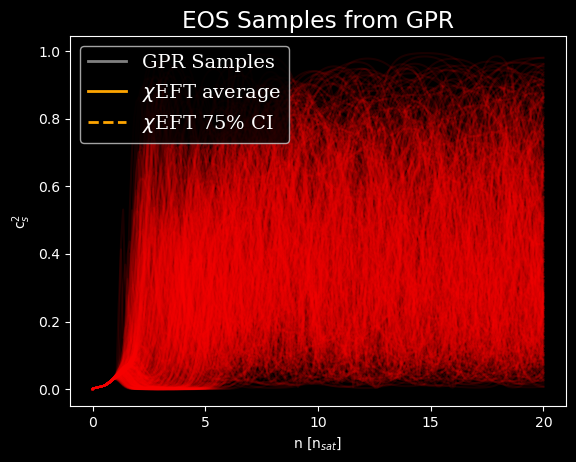

<Figure size 1000x600 with 0 Axes>

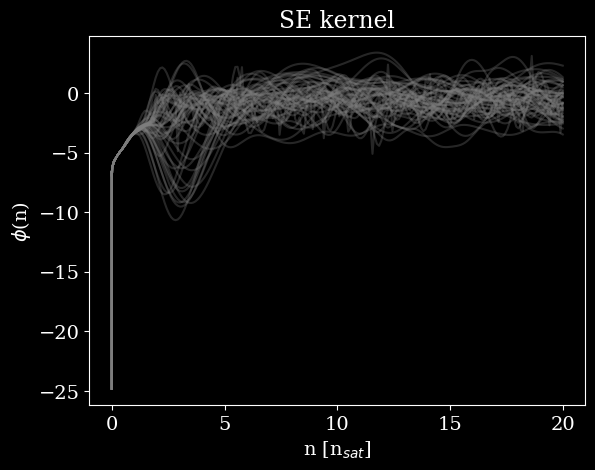

<Figure size 1000x600 with 0 Axes>

In [6]:
plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14


legend_elements = [
    Line2D([0], [0], color='grey', lw=2, alpha=1, label='GPR Samples'),
    Line2D([0], [0], color='orange', lw=2, alpha=1, label= r"$\chi$EFT average"),
    Line2D([0], [0], linestyle="--" , color='orange', lw=2, alpha=1, label = r"$\chi$EFT 75% CI")
]

for i in range(len(cs2s_val)):
    plt.plot(n_test, cs2s_val[i], color='red', alpha=0.1)

#plt.plot(n_ceft, cs2_ceft_avg, color = "orange")
#plt.plot(n_ceft, cs2_ceft_upper, "--", color = "orange")
#plt.plot(n_ceft, cs2_ceft_lower, "--", color = "orange")

plt.ylabel('c$_s^2$')
plt.xlabel('n [n$_{sat}$]')
plt.legend(handles=legend_elements)
plt.title("EOS Samples from GPR")
plt.figure(figsize=(10, 6))
plt.show()

for i in range(50):
    plt.plot(n_test, get_phi(cs2s_val[i]), color='grey', alpha=0.3)

plt.ylabel(r'$\phi$(n)')
plt.xlabel('n [n$_{sat}$]')
plt.title(f"{kernel} kernel")
plt.figure(figsize=(10, 6))

plt.show()



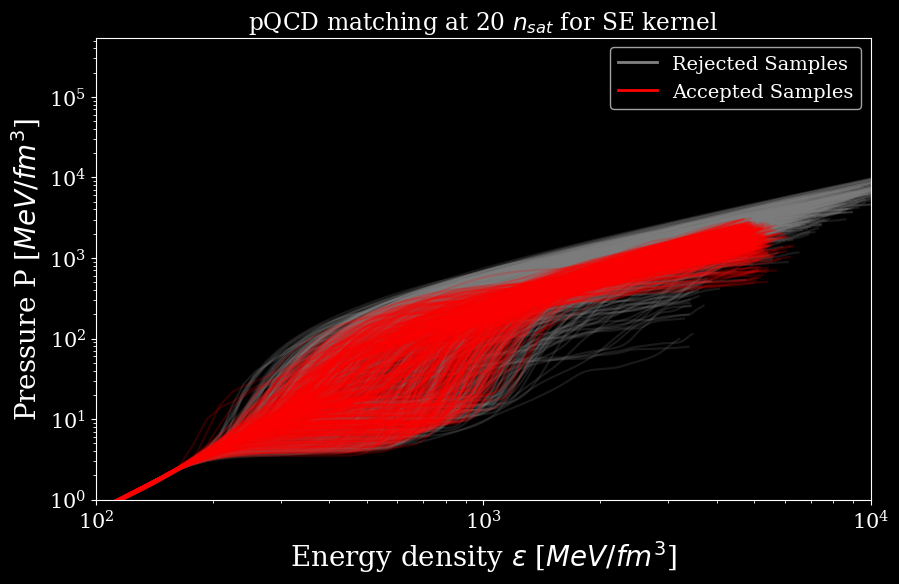

In [7]:
plt.figure(figsize=(10, 6))


for i in range(len(edens_inval)):
    plt.plot(edens_inval[i], prezzes_inval[i], color='grey', alpha=0.2)

for i in range(len(edens_val)):
    plt.plot(edens_val[i], prezzes_val[i], color='red', alpha=0.2)


plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"

sat = "{sat}"
plt.title(f"pQCD matching at {n_end} $n_{sat}$ for {kernel} kernel")
plt.grid(False)


plt.yscale("log")
plt.xscale("log")

plt.xlim(100,10000)
plt.ylim(1,)

legend_elements = [
    Line2D([0], [0], color='grey', lw=2, alpha=1, label='Rejected Samples'),
    Line2D([0], [0], color='red', lw=2, alpha=1, label='Accepted Samples')
]
plt.legend(handles=legend_elements)
plt.xlabel(r"Energy density $\epsilon$ [$MeV/fm^{3}$]", fontsize=20)
plt.ylabel(r'Pressure P [$MeV/fm^{3}$]', fontsize=20)



plt.rcParams["font.size"] = 20
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()




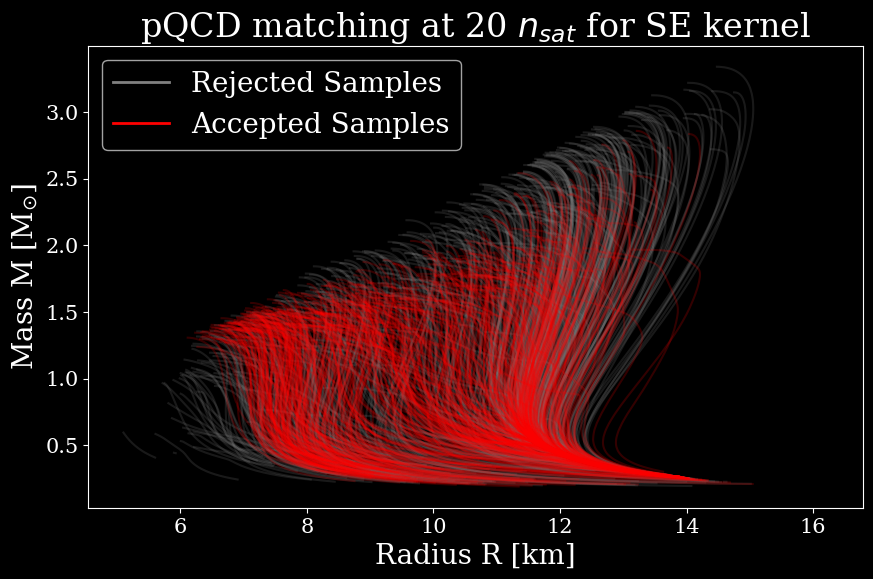

In [8]:
plt.figure(figsize=(10, 6))


for i in range(len(r_inval)):
    plt.plot(r_inval[i], m_inval[i], color='grey', alpha=0.2)



for i in range(len(r_val)):
    plt.plot(r_val[i], m_val[i], color='red', alpha=0.2)


plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"


sat = "{sat}"
plt.title(f"pQCD matching at {n_end} $n_{sat}$ for {kernel} kernel")
plt.grid(False)


legend_elements = [
    Line2D([0], [0], color='grey', lw=2, alpha=1, label='Rejected Samples'),
    Line2D([0], [0], color='red', lw=2, alpha=1, label='Accepted Samples')
]
plt.legend(handles=legend_elements)
plt.xlabel(r"Radius R [km]", fontsize=20)
plt.ylabel(r'Mass M [M$_{\odot}$]', fontsize=20)



plt.rcParams["font.size"] = 20
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



# TOV

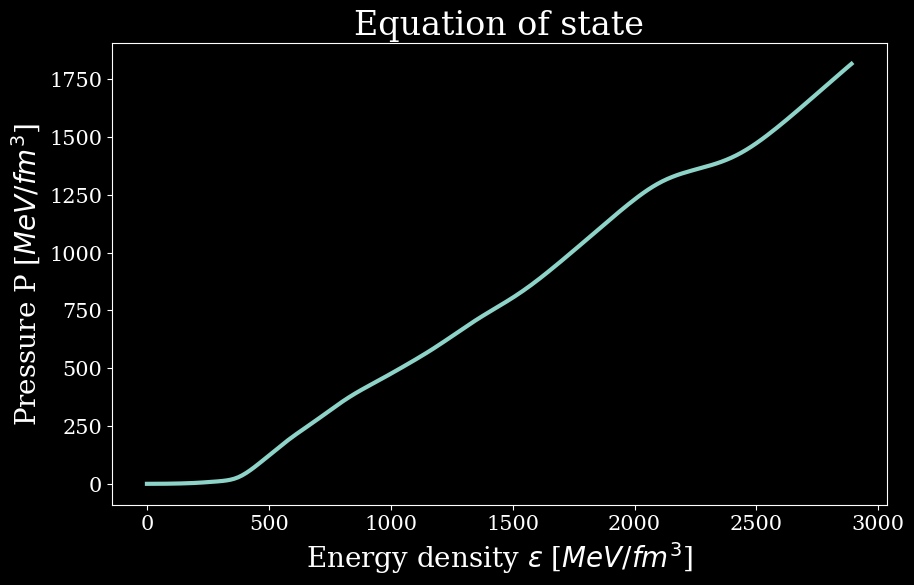

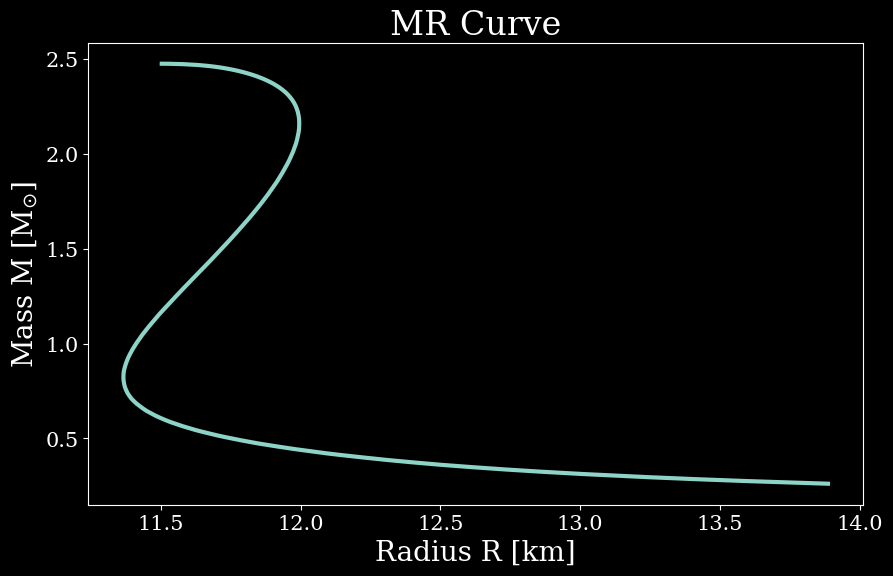

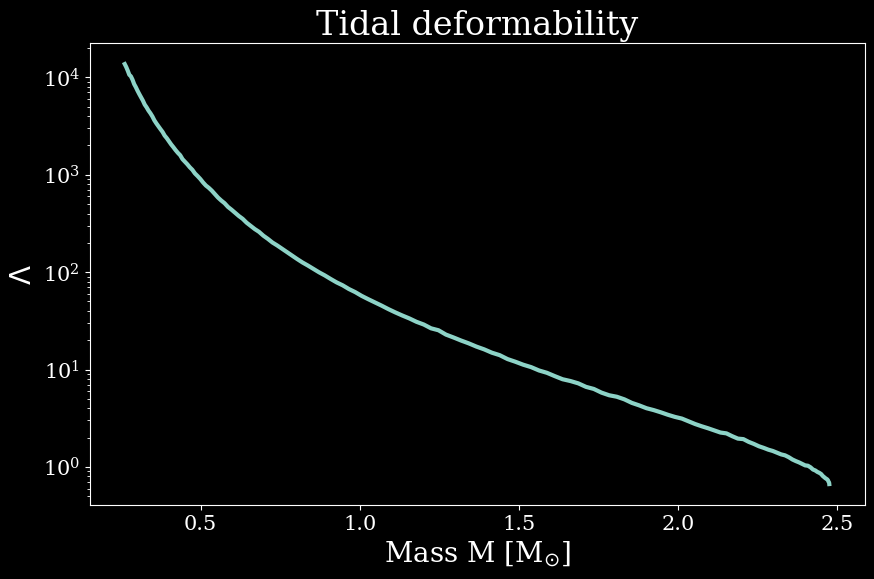

In [9]:
kernel = "tov"
n_end = 10

plt.figure(figsize=(10, 6))


samples_valid = np.load(path / f"{kernel}_{n_end}ns_valid_eos.npy")
edens_val = samples_valid[0]
prezzes_val = samples_valid[1]
cs2s_val = samples_valid[2]

tov_valid = np.load(path / f"{kernel}_{n_end}ns_valid_tidal.npy")
r_val = tov_valid[0]
m_val = tov_valid[1]
l_val = tov_valid[2]


for i in range(len(edens_val)):
    plt.plot(edens_val[i], prezzes_val[i], alpha=1, linewidth=3)



plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"

plt.xlabel(r"Energy density $\epsilon$ [$MeV/fm^{3}$]", fontsize=20)
plt.ylabel(r'Pressure P [$MeV/fm^{3}$]', fontsize=20)

sat = "{sat}"
plt.title(f"Equation of state")
plt.grid(False)


plt.rcParams["font.size"] = 20
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



plt.figure(figsize=(10, 6))


for i in range(len(r_val)):
    plt.plot(r_val[i], m_val[i], alpha=1, linewidth=3)


plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"

plt.xlabel(r"Radius R [km]", fontsize=20)
plt.ylabel(r'Mass M [M$_{\odot}$]', fontsize=20)

sat = "{sat}"
plt.title(f"MR Curve")
plt.grid(False)


plt.rcParams["font.size"] = 20
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


plt.figure(figsize=(10, 6))


for i in range(len(r_val)):
    plt.plot(m_val[i], l_val[i], alpha=1, linewidth=3)


plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"

plt.ylabel(r"$\Lambda$", fontsize=20)
plt.xlabel(r'Mass M [M$_{\odot}$]', fontsize=20)

plt.yscale("log")
plt.title(f"Tidal deformability")
plt.grid(False)



plt.rcParams["font.size"] = 20
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()




# pqcd

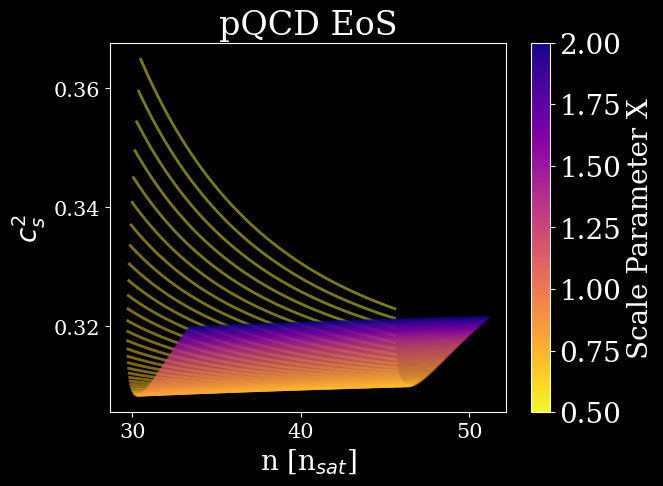

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

mu_grid = np.linspace(2.4, 2.75, 100)

pQCD1 = pQCD(1/2)  
pQCD2 = pQCD(2)    
array = np.geomspace(1/2, 2, 100)

norm = mcolors.Normalize(vmin=array.min(), vmax=array.max())
colormap = cm.plasma_r
for i in array:
    pQCDx = pQCD(i)
    color = colormap(norm(i)) 
    plt.plot(np.vectorize(pQCDx.number_density)(mu_grid)/0.16, 
             np.vectorize(pQCDx.speed2)(mu_grid), 
             color=color, alpha=0.5,
             linewidth=2)


sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array(array)  
cbar = plt.colorbar(sm, ax=plt.gca()) 
cbar.set_label('Scale Parameter X', fontsize=20)

plt.rcParams["font.size"] = 20
plt.ylabel('$c_s^2$', fontsize=20)
plt.xlabel('n [n$_{sat}$]', fontsize=20)
plt.title('pQCD EoS')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

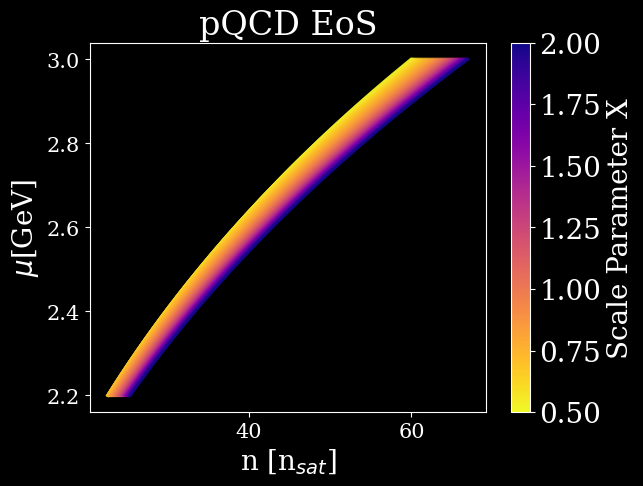

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

mu_grid = np.linspace(2.2, 3, 100)

pQCD1 = pQCD(1/2)  
pQCD2 = pQCD(2)    
array = np.geomspace(1/2, 2, 100)

norm = mcolors.Normalize(vmin=array.min(), vmax=array.max())
colormap = cm.plasma_r
for i in array:
    pQCDx = pQCD(i)
    color = colormap(norm(i)) 
    plt.plot(np.vectorize(pQCDx.number_density)(mu_grid)/0.16, 
             mu_grid, 
             color=color, alpha=0.5,
             linewidth=2)


sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array(array)  
cbar = plt.colorbar(sm, ax=plt.gca()) 
cbar.set_label('Scale Parameter X', fontsize=20)

plt.rcParams["font.size"] = 20
plt.ylabel('$\mu$[GeV]', fontsize=20)
plt.xlabel('n [n$_{sat}$]', fontsize=20)
plt.title('pQCD EoS')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

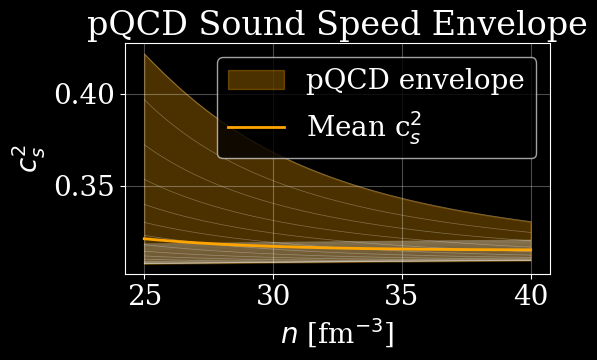

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Set up the n grid and X samples
n_pqcd_grid = np.linspace(25, 40, 200) * 0.16   # fm⁻³
X_grid = np.geomspace(0.5, 2.0, 40)              # or use np.geomspace

# 2. Generate c_s² curves for each X
cs2_family = []
for X in X_grid:
    n_raw, cs2_raw = pp.get_pqcd(X)
    n_raw = n_raw * 0.16                        # convert to fm⁻³
    cs2_interp = np.interp(n_pqcd_grid, n_raw, cs2_raw)
    cs2_family.append(cs2_interp)

cs2_family = np.array(cs2_family)               # shape: (n_X, n_n)
cs2_min = cs2_family.min(axis=0)
cs2_max = cs2_family.max(axis=0)
cs2_mean = cs2_family.mean(axis=0)

# 3. Plotting the envelope

plt.figure(figsize=(6, 4))
for cs2 in cs2_family:
    plt.plot(n_pqcd_grid/0.16, cs2, lw=0.5, alpha=0.3, color='white')

plt.fill_between(n_pqcd_grid/0.16, cs2_min, cs2_max, color='orange', alpha=0.3, label='pQCD envelope')
plt.plot(n_pqcd_grid/0.16, cs2_mean, color='orange', lw=2, label='Mean c$_s^2$')
plt.xlabel(r'$n$ [fm$^{-3}$]')
plt.ylabel(r'$c_s^2$')
plt.title('pQCD Sound Speed Envelope')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


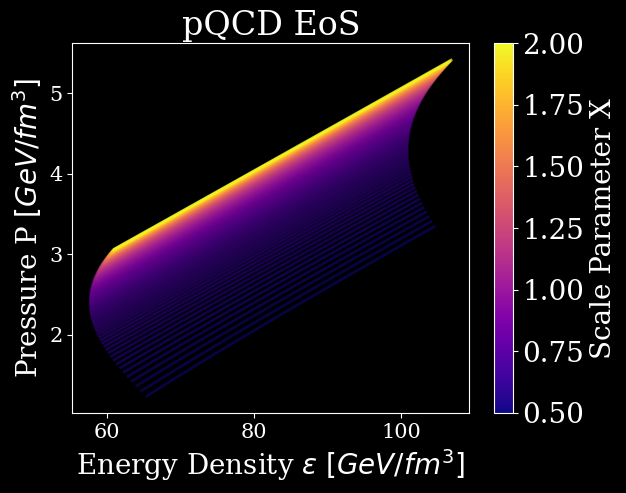

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

mu_grid = np.linspace(2.4, 2.75, 100)

pQCD1 = pQCD(1/2)  
pQCD2 = pQCD(2)    
array = np.geomspace(1/2, 2, 100)

norm = mcolors.Normalize(vmin=array.min(), vmax=array.max())
colormap = cm.plasma
for i in array:
    pQCDx = pQCD(i)
    color = colormap(norm(i)) 
    plt.plot(np.vectorize(pQCDx.edens)(mu_grid)/0.16, 
             np.vectorize(pQCDx.pressure)(mu_grid), 
             color=color, alpha=0.5,
             linewidth=2)


sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array(array)  
cbar = plt.colorbar(sm, ax=plt.gca()) 
cbar.set_label('Scale Parameter X', fontsize=20)

plt.rcParams["font.size"] = 20
plt.ylabel('Pressure P $[GeV/fm^3]$', fontsize=20)
plt.xlabel(r'Energy Density $\epsilon$ $[GeV/fm^3]$', fontsize=20)
plt.title('pQCD EoS')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()